In [1]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

text = "해보지 않으면 해낼 수 없다"

result = text_to_word_sequence(text)
print("\n원문:\n", text)
print("\n원문:\n", result)


원문:
 해보지 않으면 해낼 수 없다

원문:
 ['해보지', '않으면', '해낼', '수', '없다']


In [2]:
import numpy
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding

docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
    '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
    '토큰화 한 결과는 딥러닝에서 사용 할 수 있습니다.' ]
# 토큰화 함수를 이용해 전처리 하는 과정입니다.
token = Tokenizer()

In [4]:
token.fit_on_texts(docs)
print("\n단어 카운트:In" , token.word_counts)
#Tokenizer()의 word counts 함수는 순서를 기억하는 OrderedDict클래스를 사용합니다.
#출력되는 순서는 랜덤입니다.
print("\n문장 카운트: ", token.document_count)
print("\n각 단어가 몇개의 문장에 포함되어 있는가:In", token.word_docs)
print("\n각 단어에 매겨진 인덱스 값:In", token.word_index)


단어 카운트:In OrderedDict([('먼저', 2), ('텍스트의', 4), ('각', 2), ('단어를', 2), ('나누어', 2), ('토큰화', 6), ('합니다', 2), ('단어로', 2), ('해야', 2), ('딥러닝에서', 4), ('인식됩니다', 2), ('한', 2), ('결과는', 2), ('사용', 2), ('할', 2), ('수', 2), ('있습니다', 2)])

문장 카운트:  6

각 단어가 몇개의 문장에 포함되어 있는가:In defaultdict(<class 'int'>, {'텍스트의': 4, '합니다': 2, '먼저': 2, '토큰화': 6, '단어를': 2, '각': 2, '나누어': 2, '해야': 2, '딥러닝에서': 4, '단어로': 2, '인식됩니다': 2, '있습니다': 2, '할': 2, '한': 2, '수': 2, '결과는': 2, '사용': 2})

각 단어에 매겨진 인덱스 값:In {'토큰화': 1, '텍스트의': 2, '딥러닝에서': 3, '먼저': 4, '각': 5, '단어를': 6, '나누어': 7, '합니다': 8, '단어로': 9, '해야': 10, '인식됩니다': 11, '한': 12, '결과는': 13, '사용': 14, '할': 15, '수': 16, '있습니다': 17}


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

text ="오랫동안 꿈꾸는 이는 그 꿈을 닮아간다"

token = Tokenizer()
token.fit_on_texts([text])
print(token.word_index)

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}


In [8]:
x = token.texts_to_sequences([text])
print("\n텍스트, 토큰화 결과:\n", x)


텍스트, 토큰화 결과:
 [[1, 2, 3, 4, 5, 6]]


In [9]:
from tensorflow.keras.utils import to_categorical

word_size = len(token.word_index) + 1
x = to_categorical(x, num_classes=word_size)

print(x)

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


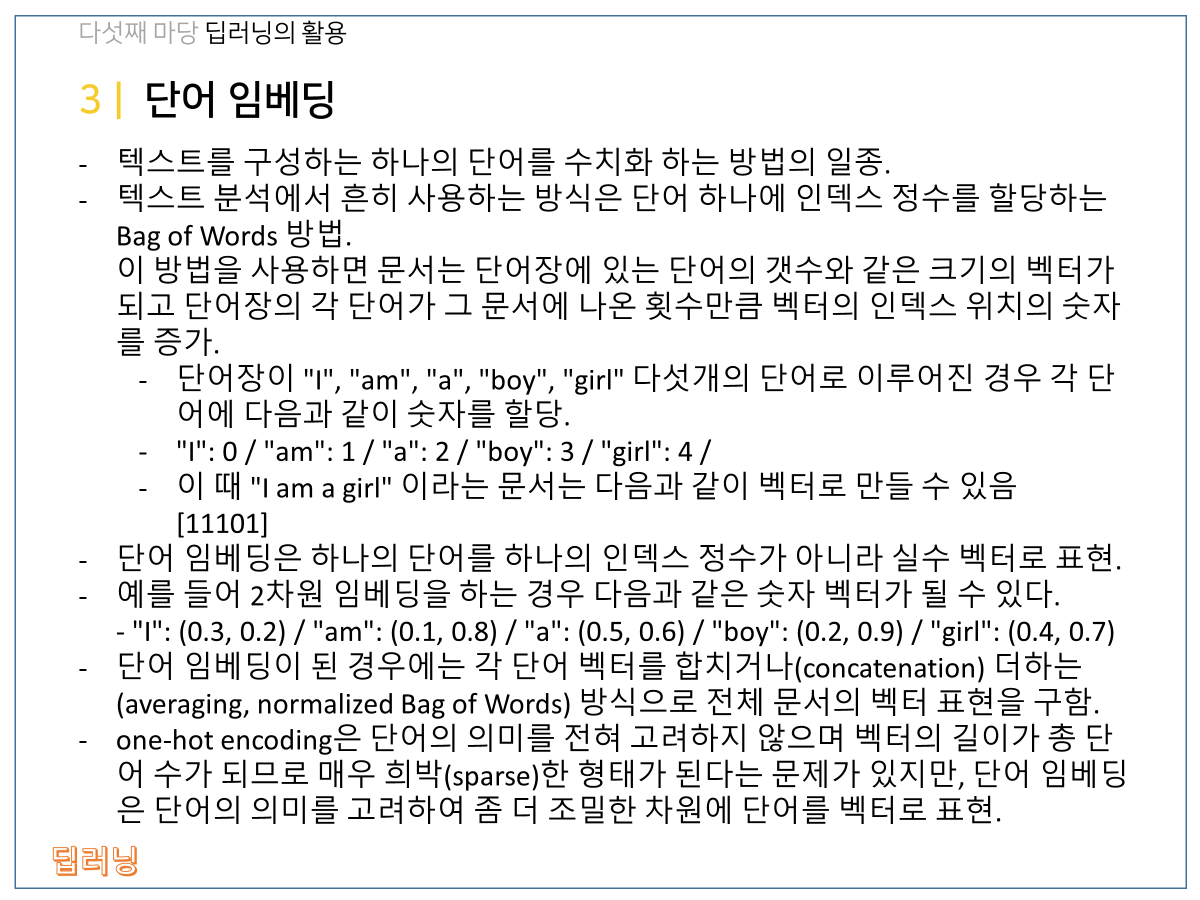

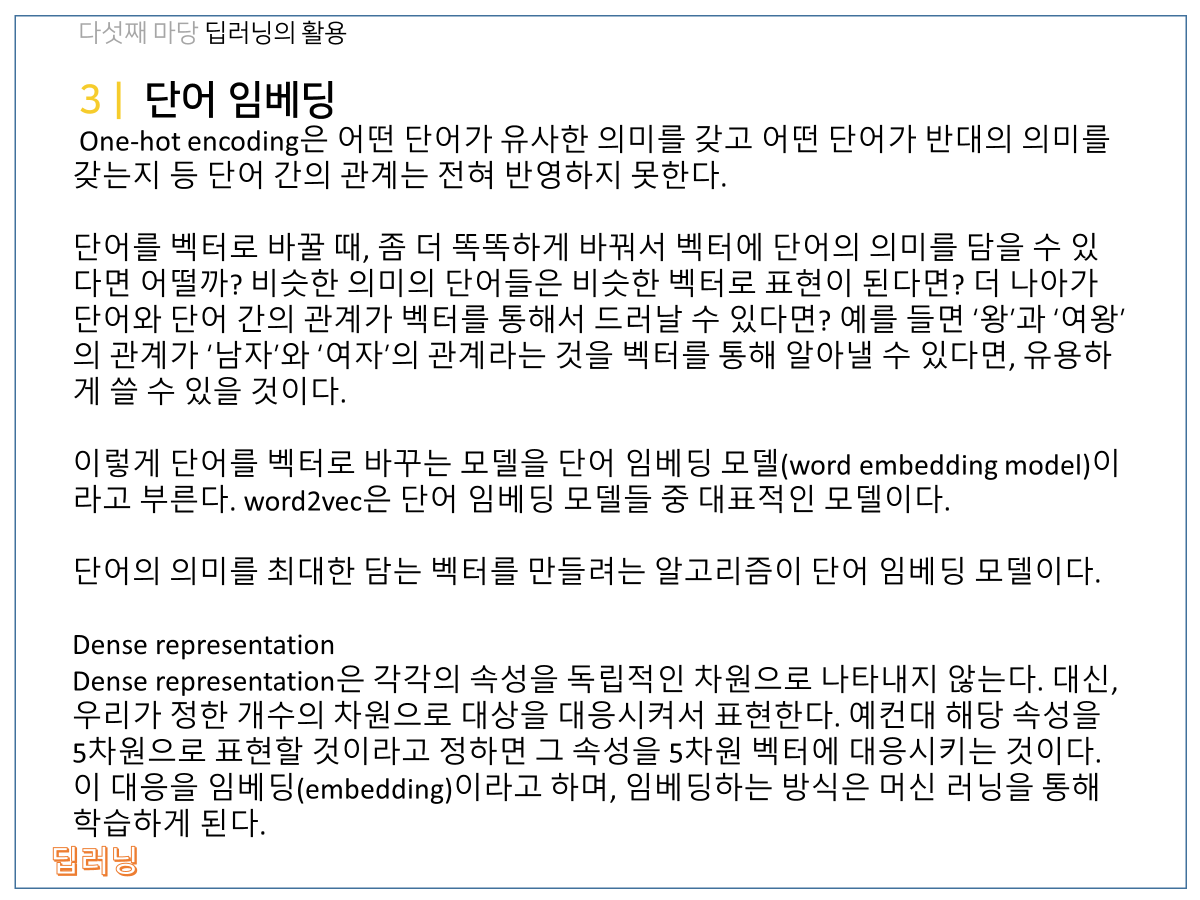

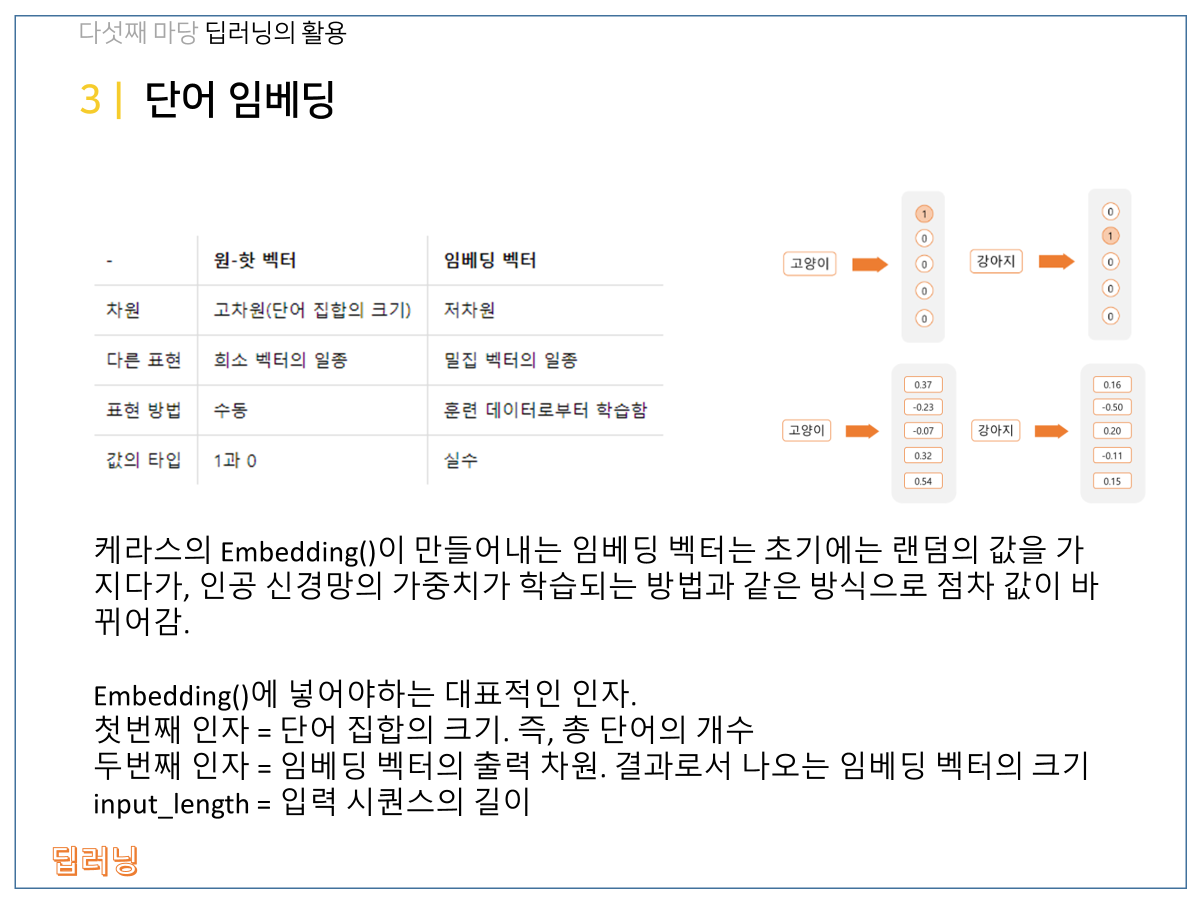

In [18]:
from numpy import array
docs = ["너무 재밌네요", "최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다"," 한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요", "재미 없어요"]

classes = array([1,1,1,1,1,0,0,0,0,0])

from tensorflow.keras.preprocessing.text import Tokenizer

token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)
x = token.texts_to_sequences(docs)
print("\n리뷰 텍스트, 토큰화 결과:\n", x)

from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_x = pad_sequences(x, 4)
print("\n패딩 결과\n", padded_x)



{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미': 20, '없어요': 21}

리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20, 21]]

패딩 결과
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0 20 21]]


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding

print("\n딥러닝 모델 시작:")
word_size = len(token.word_index) + 1
model = Sequential()

# model.add(Embedding(word_size, 8, input_length=4))
embedding_layer = Embedding(word_size, 8, input_length=4)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)
print("\n Accuracy: %.4f" % (model. evaluate (padded_x, classes) [1]))


딥러닝 모델 시작:
Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.6000 - loss: 0.6907
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6000 - loss: 0.6886
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7000 - loss: 0.6866
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7000 - loss: 0.6845
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7000 - loss: 0.6824
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7000 - loss: 0.6804
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7000 - loss: 0.6783
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7000 - loss: 0.6762
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7000 - loss: 0.6742
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7000 - loss: 0.6721
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7000 - loss: 0.6700
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7000 - loss: 0.6679
Epoch 13/20
1/

In [32]:
new_reviews = ["참 재밌네요", "별로였어요", "잘 만든 영화입니다", "지루하네요 재미없어요"]
new_sequences= token.texts_to_sequences(new_reviews)
padded_new_sequences = pad_sequences(new_sequences, 4)

predictions = model.predict(padded_new_sequences)

for review, prediction in zip(new_reviews, predictions):
    print(f"리뷰: {review} -> 예측: {'긍정' if prediction > 0.5 else '부정'} (확률: {prediction[0]:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
리뷰: 참 재밌네요 -> 예측: 긍정 (확률: 0.5011)
리뷰: 별로였어요 -> 예측: 부정 (확률: 0.4764)
리뷰: 잘 만든 영화입니다 -> 예측: 긍정 (확률: 0.5169)
리뷰: 지루하네요 재미없어요 -> 예측: 부정 (확률: 0.4656)


In [33]:
embedding_weights = embedding_layer.get_weights()[0]
print("\n단어별 임베딩 벡터:\n")

for word, index in token.word_index.items():
    print(f"단어: {word} -> 임베딩 벡터: {embedding_weights[index]}")


단어별 임베딩 벡터:

단어: 너무 -> 임베딩 벡터: [-0.02883487  0.04853103 -0.00092872 -0.03184298 -0.03094533 -0.01986889
  0.01975144  0.02448858]
단어: 재밌네요 -> 임베딩 벡터: [-0.06368655  0.02972464 -0.03334421  0.00368501  0.05026264 -0.01079255
 -0.05864666 -0.04833653]
단어: 최고예요 -> 임베딩 벡터: [ 0.02206328 -0.06544346 -0.05028874 -0.02002058  0.01742485  0.00709703
 -0.002218   -0.01215719]
단어: 참 -> 임베딩 벡터: [-0.05987344  0.00251662  0.04780706 -0.0128356  -0.02075433 -0.0662737
  0.01292432  0.02855852]
단어: 잘 -> 임베딩 벡터: [ 0.01989048  0.00371398  0.06700334 -0.04024321 -0.03444537 -0.01279892
  0.01794093  0.00952008]
단어: 만든 -> 임베딩 벡터: [ 0.01074128  0.026593    0.01979617 -0.04704893 -0.01750807 -0.02759615
 -0.05169327 -0.00314203]
단어: 영화예요 -> 임베딩 벡터: [ 2.5878996e-02  2.7262945e-02 -1.2296831e-02  6.2202614e-02
  3.7163634e-02 -5.2485440e-05 -1.3581324e-02 -5.1764090e-02]
단어: 추천하고 -> 임베딩 벡터: [ 0.01793266  0.00602549 -0.01605627  0.02384145 -0.001528   -0.05746175
  0.00246971  0.05132902]
단어: 싶은 -> 임베딩 벡터: [-0

In [34]:
import pickle
# 토크나이저 저장
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(token, handle, protocol=pickle.HIGHEST_PROTOCOL)
# 토크나이저 로드
with open('tokenizer.pickle', 'rb') as handle:
    token = pickle.load(handle)

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
text="I am a boy. My name is David."

token = Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n',
    lower=False,
    split=' ',
    char_level=False,
    oov_token=None,
    document_count=0,
)
token.fit_on_texts([text])
print(token.word_index)

{'I': 1, 'am': 2, 'a': 3, 'boy': 4, 'My': 5, 'name': 6, 'is': 7, 'David': 8}


In [61]:
import numpy as numpy
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index ={}
i = 1
for phrase in samples:
    phrase=phrase.replace(".", "")
    for word in phrase.split():
        if word not in token_index:
            token_index[word] = i 
            i +=1
        else:
            pass

print(token_index)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework': 10}


단어수준 원핫 인코딩

In [62]:
import numpy as np 
max_length = 10

results = np.zeros ((len(samples), max_length, max (token_index.values()) + 1))
for i, sample in enumerate(samples):
    print (sample)
    for j, word in list(enumerate(sample.replace('.',' ').split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1

print(results)

The cat sat on the mat.
The dog ate my homework.
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
